In [11]:
from qiskit.quantum_info import Operator
from qiskit import QuantumCircuit
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np

In [12]:
def phase_oracle(n, indices_to_mark, name = 'Oracle'):
    
    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name=name)
    
    # create the identity matrix on n qubits
    oracle_matrix = np.identity(2**n)
    
    # add the -1 phase to marked elements
    for index_to_mark in indices_to_mark:
        oracle_matrix[index_to_mark, index_to_mark] = -1

    # convert the oracle_matrix into an operator, and add it to the quantum circuit
    qc.unitary(Operator(oracle_matrix), range(n))
    
    return qc

In [13]:
def diffuser(n):
    
    # create a quantum circuit on n qubits
    qc = QuantumCircuit(n, name='Diffuser')
        
    # apply hadamard gates to all qubits
    qc.h(range(n))
    
    # call the phase oracle applied to the zero state
    qc.append(phase_oracle(n, [0]), range(n))
    
    # apply hadamard gates to all qubits
    qc.h(range(n))
        
    return qc

In [14]:
def Grover(n, indices_of_marked_elements):
    
    # Create a quantum circuit on n qubits
    qc = QuantumCircuit(n, n)
    
    # Determine r
    r = int(np.floor(np.pi/4*np.sqrt(2**n/len(indices_of_marked_elements))))
    print(f'{n} qubits, basis states {indices_of_marked_elements} marked, {r} rounds')
    
    # step 1: apply Hadamard gates on all qubits
    qc.h(range(n))
    
    # step 2: apply r rounds of the phase oracle and the diffuser
    for _ in range(r):
        qc.append(phase_oracle(n, indices_of_marked_elements), range(n))
        qc.append(diffuser(n), range(n))
        
    # step 3: measure all qubits
    qc.measure(range(n), range(n))
  
    return qc

In [17]:
mycircuit = Grover(8, [3,5])
mycircuit.draw(output='text')

8 qubits, basis states [3, 5] marked, 8 rounds


┌───┐┌─────────┐┌───────────┐┌─────────┐┌───────────┐┌─────────┐»
q_0: ┤ H ├┤0        ├┤0          ├┤0        ├┤0          ├┤0        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_1: ┤ H ├┤1        ├┤1          ├┤1        ├┤1          ├┤1        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_2: ┤ H ├┤2        ├┤2          ├┤2        ├┤2          ├┤2        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_3: ┤ H ├┤3        ├┤3          ├┤3        ├┤3          ├┤3        ├»
     ├───┤│  Oracle ││  Diffuser ││  Oracle ││  Diffuser ││  Oracle │»
q_4: ┤ H ├┤4        ├┤4          ├┤4        ├┤4          ├┤4        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_5: ┤ H ├┤5        ├┤5          ├┤5        ├┤5          ├┤5        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_6: ┤ H ├┤6        ├┤6          ├┤6        ├┤6          ├┤6        ├»
     ├───┤│         ││           ││         ││           ││         │»
q_7: ┤ H ├┤7        ├┤7          ├┤7        ├┤7          ├┤7        ├»
     └───┘└─────────┘└───────────┘└─────────┘└───────────┘└─────────┘»
c_0: ════════════════════════════════════════════════════════════════»
                                                                     »
c_1: ════════════════════════════════════════════════════════════════»
                                                                     »
c_2: ════════════════════════════════════════════════════════════════»
                                                                     »
c_3: ════════════════════════════════════════════════════════════════»
                                                                     »
c_4: ════════════════════════════════════════════════════════════════»
                                                                     »
c_5: ════════════════════════════════════════════════════════════════»
                                                                     »
c_6: ════════════════════════════════════════════════════════════════»
                                                                     »
c_7: ════════════════════════════════════════════════════════════════»
                                                                     »
«     ┌───────────┐┌─────────┐┌───────────┐┌─────────┐┌───────────┐┌─────────┐»
«q_0: ┤0          ├┤0        ├┤0          ├┤0        ├┤0          ├┤0        ├»
«     │           ││         ││           ││         ││           ││         │»
«q_1: ┤1          ├┤1        ├┤1          ├┤1        ├┤1          ├┤1        ├»
«     │           ││         ││           ││         ││           ││         │»
«q_2: ┤2          ├┤2        ├┤2          ├┤2        ├┤2          ├┤2        ├»
«     │           ││         ││           ││         ││           ││         │»
«q_3: ┤3          ├┤3        ├┤3          ├┤3        ├┤3          ├┤3        ├»
«     │  Diffuser ││  Oracle ││  Diffuser ││  Oracle ││  Diffuser ││  Oracle │»
«q_4: ┤4          ├┤4        ├┤4          ├┤4        ├┤4          ├┤4        ├»
«     │           ││         ││           ││         ││           ││         │»
«q_5: ┤5          ├┤5        ├┤5          ├┤5        ├┤5          ├┤5        ├»
«     │           ││         ││           ││         ││           ││         │»
«q_6: ┤6          ├┤6        ├┤6          ├┤6        ├┤6          ├┤6        ├»
«     │           ││         ││           ││         ││           ││         │»
«q_7: ┤7          ├┤7        ├┤7          ├┤7        ├┤7          ├┤7        ├»
«     └───────────┘└─────────┘└───────────┘└─────────┘└───────────┘└─────────┘»
«c_0: ════════════════════════════════════════════════════════════════════════»
«                                                                             »
«c_1: ════════════════════════════════════════════════════════════════════════»
«                                                             

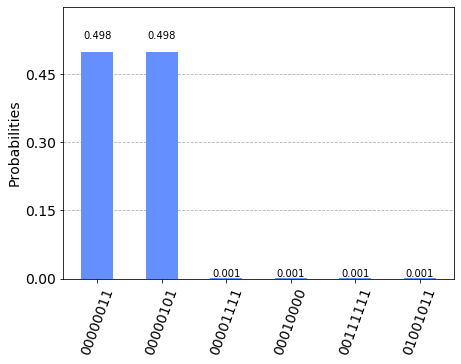

In [18]:
simulator = Aer.get_backend('qasm_simulator')
counts = execute(mycircuit, backend=simulator, shots=1000).result().get_counts(mycircuit)

plot_histogram(counts)